<b><span style="color:#3498DB;font-family:verdana;font-size:18px"> PART 1: IMPORTING DATA </span></b>

In [1]:
# First, we will import all the libraries necessary to read all the "csv" files located in the corresponding folder

import pandas as pd
import os
import glob

In [2]:
# Secondly, we tell Python which is the path where it will have to look for the files

csv_files = glob.glob(
    os.path.join(
        "E:\Mi\Documentos\Formacion\DATA ANALYTICS\Datasets Interesantes\La Liga - Partidos",
        "*.csv",
    )
)

# Next, we generate a list of dataframes and attach the csv dataframes read from the CSV files

df = []

for file in csv_files:
    dataset = pd.read_csv(file)
    df.append(dataset)

In [3]:
# We generate the dataset from the list of datasets that we have generated with the imported files

df = pd.concat(df, ignore_index=True)

<b><span style="color:#3498DB;font-family:verdana;font-size:18px"> PART 2: PRE - PROCESSING </span></b>

In [4]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 76 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       3800 non-null   object 
 1   Date      3800 non-null   object 
 2   HomeTeam  3800 non-null   object 
 3   AwayTeam  3800 non-null   object 
 4   FTHG      3800 non-null   int64  
 5   FTAG      3800 non-null   int64  
 6   FTR       3800 non-null   object 
 7   HTHG      3800 non-null   int64  
 8   HTAG      3800 non-null   int64  
 9   HTR       3800 non-null   object 
 10  HS        3800 non-null   int64  
 11  AS        3800 non-null   int64  
 12  HST       3800 non-null   int64  
 13  AST       3800 non-null   int64  
 14  HF        3800 non-null   int64  
 15  AF        3800 non-null   int64  
 16  HC        3800 non-null   int64  
 17  AC        3800 non-null   int64  
 18  HY        3800 non-null   int64  
 19  AY        3800 non-null   int64  
 20  HR        3800 non-null   int6

In [6]:
new_columns = {
    "Div": "League Division",
    "Date": "Match Date",
    "HomeTeam": "Home Team",
    "AwayTeam": "Away Team",
    "FTHG": "Full Time Home Team Goals",
    "FTAG": "Full Time Away Team Goals",
    "FTR": "Full Time Result",
    "HTHG": "Half Time Home Team Goals",
    "HTAG": "Half Time Away Team Goals",
    "HTR": "Half Time Result",
    "HS": "Home Team Shots",
    "AS": "Away Team Shots",
    "HST": "Home Team Shots on Target",
    "AST": "Away Team Shots on Target",
    "HHW": "Home Team Hit Woodwork",
    "AHW": "Away Team Hit Woodwork",
    "HC": "Home Team Corners",
    "AC": "Away Team Corners",
    "HF": "Home Team Fouls Committed",
    "AF": "Away Team Fouls Committed",
    "HO": "Home Team Offsides",
    "AO": "Away Team Offsides",
    "HY": "Home Team Yellow Cards",
    "AY": "Away Team Yellow Cards",
    "HR": "Home Team Red Cards",
    "AR": "Away Team Red Cards",
    "HBP": "Home Team Bookings Points (10 : yellow, 25 : red)",
    "ABP": "Away Team Bookings Points (10 : yellow, 25 : red)",
    "B365H": "Bet365 home win odds",
    "B365D": "Bet365 draw odds",
    "B365A": "Bet365 away win odds",
    "BSH": "Blue Square home win odds",
    "BSD": "Blue Square draw odds",
    "BSA": "Blue Square away win odds",
    "BWH": "Bet&Win home win odds",
    "BWD": "Bet&Win draw odds",
    "BWA": "Bet&Win away win odds",
    "GBH": "Gamebookers home win odds",
    "GBD": "Gamebookers draw odds",
    "GBA": "Gamebookers away win odds",
    "IWH": "Interwetten home win odds",
    "IWD": "Interwetten draw odds",
    "IWA": "Interwetten away win odds",
    "LBH": "Ladbrokes home win odds",
    "LBD": "Ladbrokes draw odds",
    "LBA": "Ladbrokes away win odds",
    "PSH": "Pinnacle Sports home win odds",
    "PSD": "Pinnacle Sports draw odds",
    "PSA": "Pinnacle Sports away win odds",
    "SOH": "Sporting Odds home win odds",
    "SOD": "Sporting Odds draw odds",
    "SOA": "Sporting Odds away win odds",
    "SBH": "Sportingbet home win odds",
    "SBD": "Sportingbet draw odds",
    "SBA": "Sportingbet away win odds",
    "SJH": "Stan James home win odds",
    "SJD": "Stan James draw odds",
    "SJA": "Stan James away win odds",
    "SYH": "Stanleybet home win odds",
    "SYD": "Stanleybet draw odds",
    "SYA": "Stanleybet away win odds",
    "VCH": "VC Bet home win odds",
    "VCD": "VC Bet draw odds",
    "VCA": "VC Bet away win odds",
    "WHH": "William Hill home win odds",
    "WHD": "William Hill draw odds",
    "WHA": "William Hill away win odds",
    "Bb1X2": "Number of BetBrain bookmakers used to calculate match odds averages and maximums",
    "BbMxH": "Betbrain maximum home win odds",
    "BbAvH": "Betbrain average home win odds",
    "BbMxD": "Betbrain maximum draw odds",
    "BbAvD": "Betbrain average draw win odds",
    "BbMxA": "Betbrain maximum away win odds",
    "BbAvA": "Betbrain average away win odds",
    "BbOU": "Number of BetBrain bookmakers used to calculate over/under 2.5 goals (total goals) averages and maximums",
    "BbMx>2.5": "Betbrain maximum over 2.5 goals",
    "BbAv>2.5": "Betbrain average over 2.5 goals",
    "BbMx<2.5": "Betbrain maximum under 2.5 goals",
    "BbAv<2.5": "Betbrain average under 2.5 goals",
    "GB>2.5": "Gamebookers over 2.5 goals",
    "GB<2.5": "Gamebookers under 2.5 goals",
    "B365>2.5": "Bet365 over 2.5 goals",
    "B365<2.5": "Bet365 under 2.5 goals",
    "BbAH": "Number of BetBrain bookmakers used to Asian handicap averages and maximums",
    "BbAHh": "Betbrain size of handicap (home team)",
    "BbMxAHH": "Betbrain maximum Asian handicap home team odds",
    "BbAvAHH": "Betbrain average Asian handicap home team odds",
    "BbMxAHA": "Betbrain maximum Asian handicap away team odds",
    "BbAvAHA": "Betbrain average Asian handicap away team odds",
    "GBAHH": "Gamebookers Asian handicap home team odds",
    "GBAHA": "Gamebookers Asian handicap away team odds",
    "GBAH": "Gamebookers size of handicap (home team)",
    "LBAHH": "Ladbrokes Asian handicap home team odds",
    "LBAHA": "Ladbrokes Asian handicap away team odds",
    "LBAH": "Ladbrokes size of handicap (home team)",
    "B365AHH": "Bet365 Asian handicap home team odds",
    "B365AHA": "Bet365 Asian handicap away team odds",
    "B365AH": "Bet365 size of handicap (home team)",
}

In [7]:
new_column_values={}

for i in df.columns:
    if i in new_columns.keys():
        new_column_values[i]=new_columns[i]
    else:
        new_column_values[i]="Unknown"

In [8]:
df=df.rename(columns=new_column_values)

In [9]:
df=df.drop("Unknown",axis=1)

In [10]:
null_columns=[]

for i in df.columns:
    nulls=df[i].isna().sum()
    if nulls>0:
        print(f"{i}: {nulls}")
        null_columns.append(i)
    else:
        pass

Gamebookers home win odds: 2285
Gamebookers draw odds: 2285
Gamebookers away win odds: 2285
Interwetten home win odds: 6
Interwetten draw odds: 6
Interwetten away win odds: 6
Ladbrokes home win odds: 383
Ladbrokes draw odds: 383
Ladbrokes away win odds: 383
Sportingbet home win odds: 2663
Sportingbet draw odds: 2663
Sportingbet away win odds: 2663
Stan James home win odds: 1871
Stan James draw odds: 1871
Stan James away win odds: 1871
VC Bet home win odds: 1
VC Bet draw odds: 1
VC Bet away win odds: 1
Blue Square home win odds: 2280
Blue Square draw odds: 2280
Blue Square away win odds: 2280
Betbrain maximum over 2.5 goals: 1
Betbrain average over 2.5 goals: 1
Betbrain maximum under 2.5 goals: 1
Betbrain average under 2.5 goals: 1
Number of BetBrain bookmakers used to Asian handicap averages and maximums: 10
Betbrain size of handicap (home team): 10
Betbrain maximum Asian handicap home team odds: 10
Betbrain average Asian handicap home team odds: 10
Betbrain maximum Asian handicap away

In [11]:
df=df.drop(null_columns,axis=1)

In [12]:
categorical=df.select_dtypes("object").columns
numerical=df.select_dtypes("int64","float64").columns

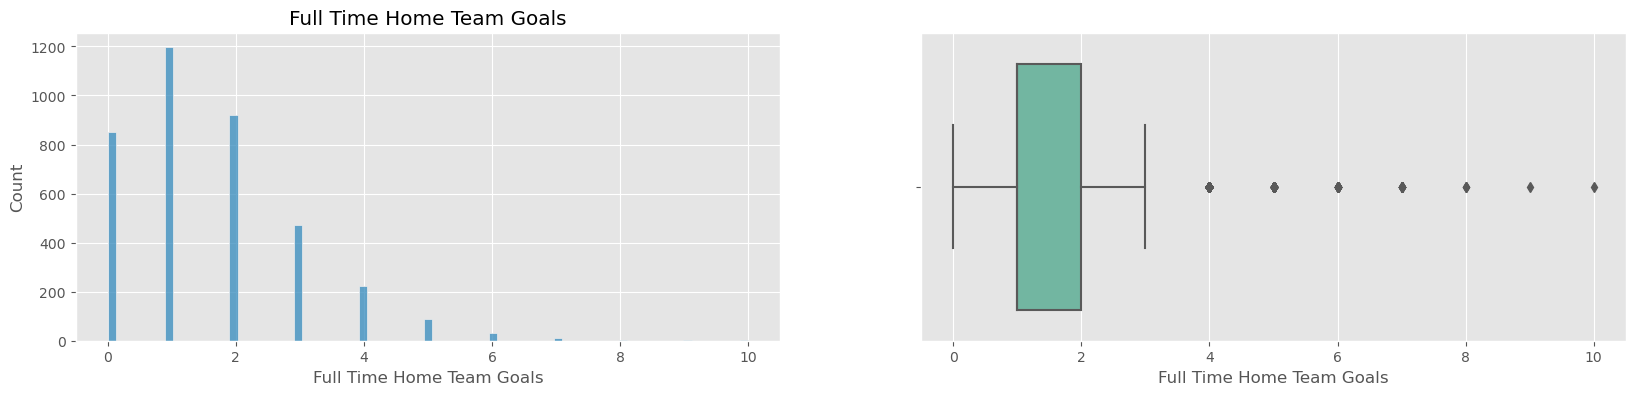

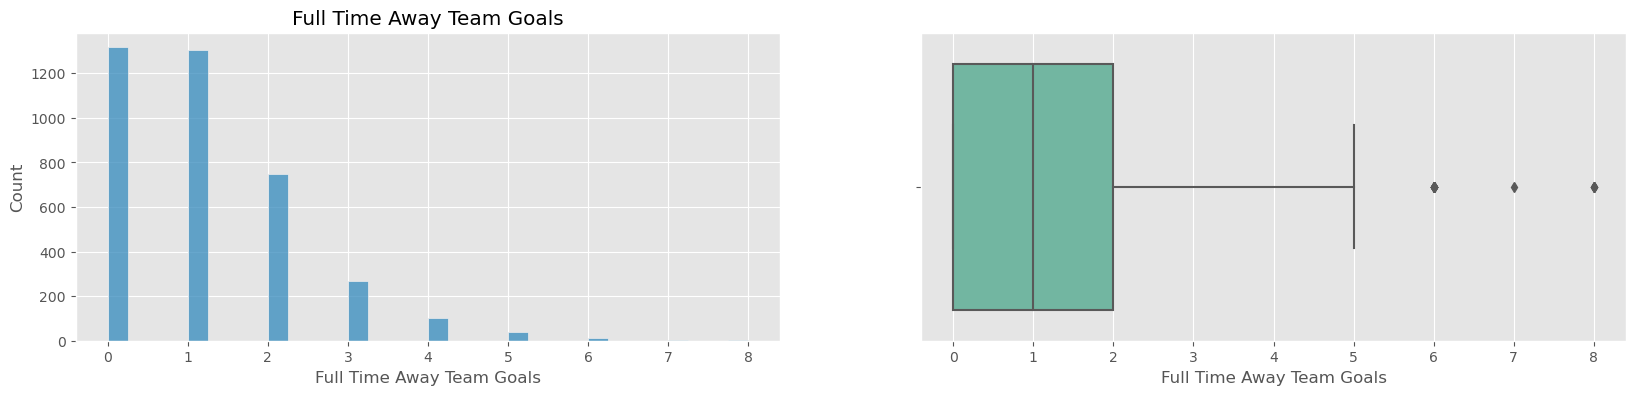

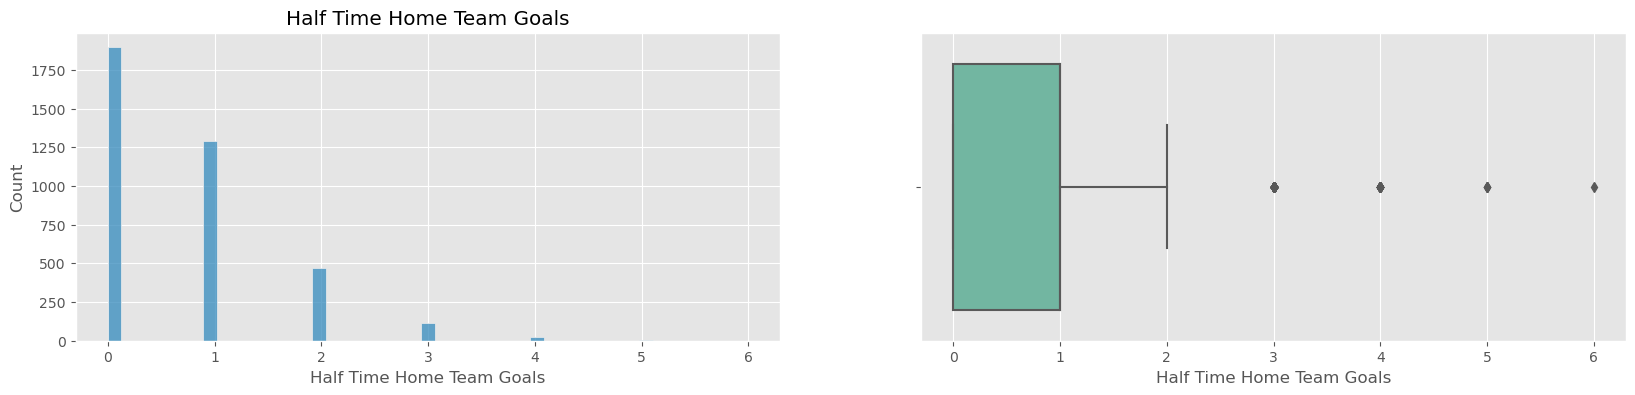

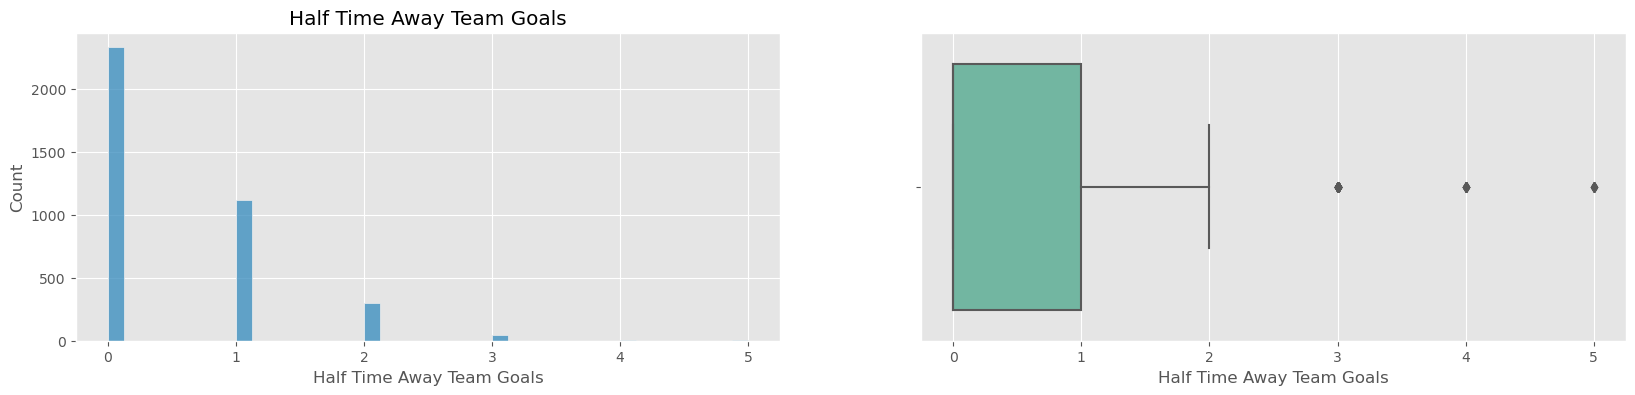

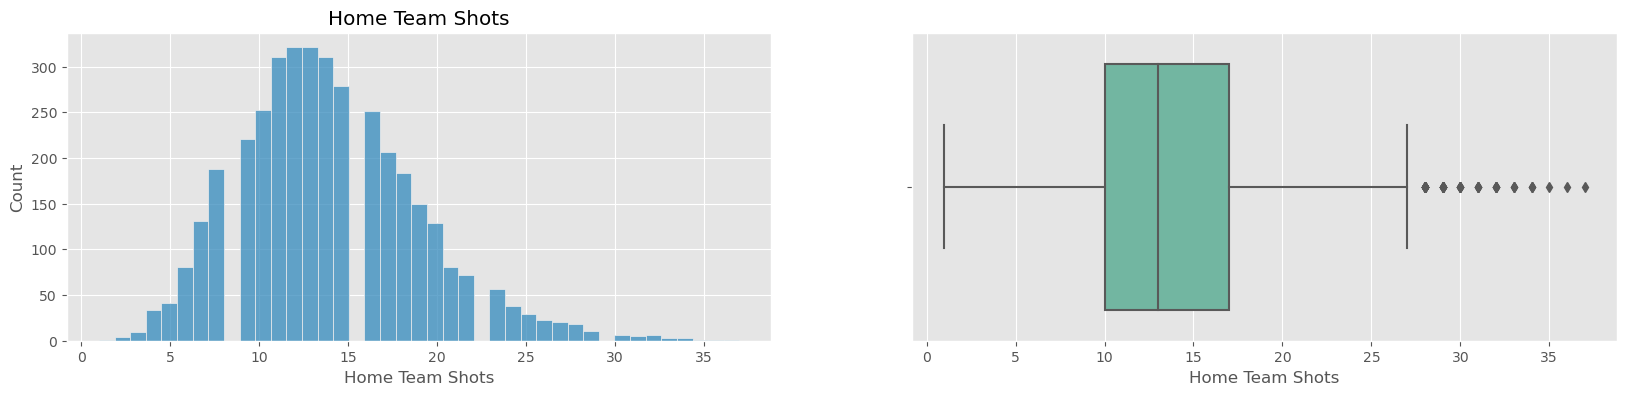

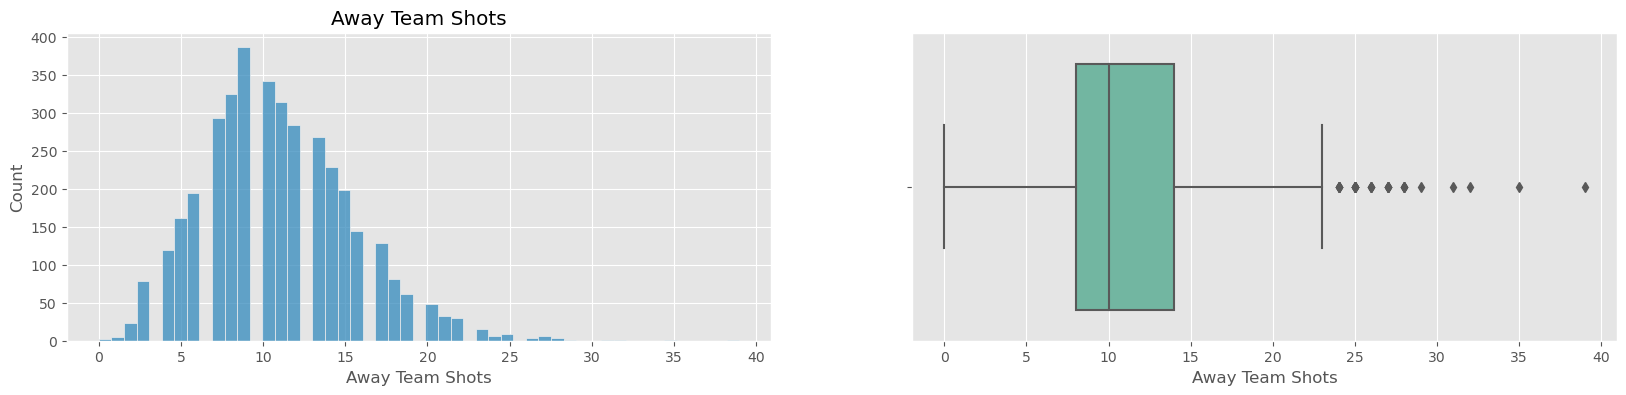

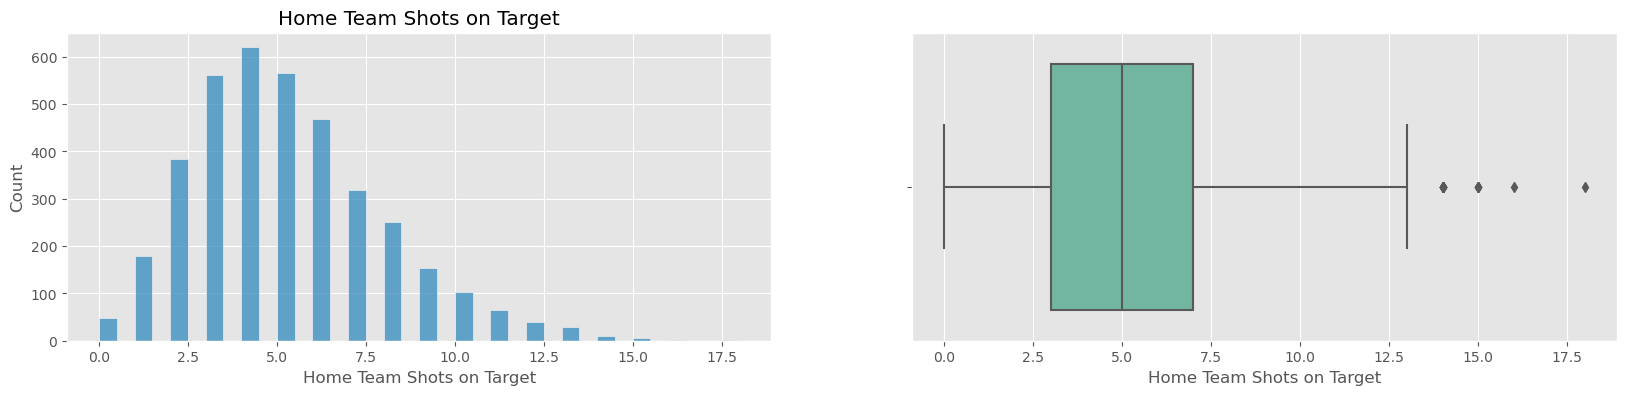

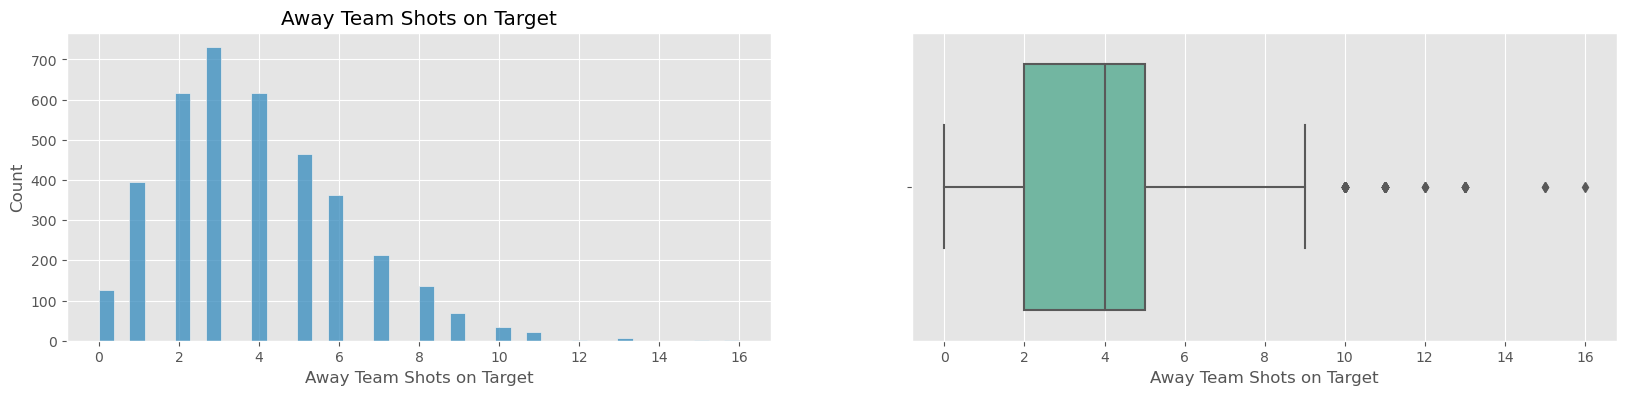

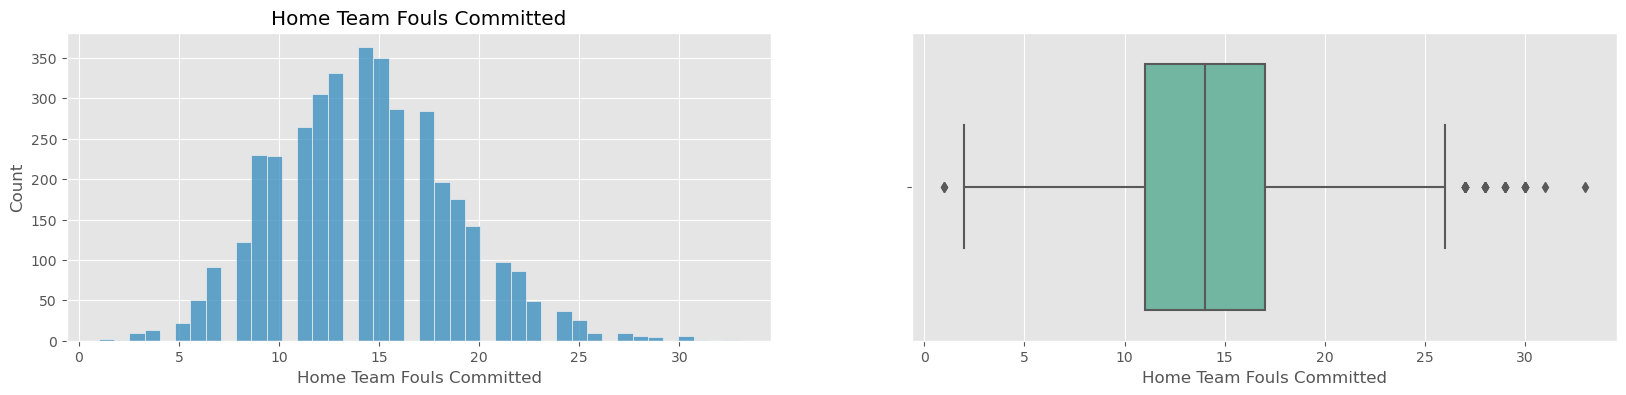

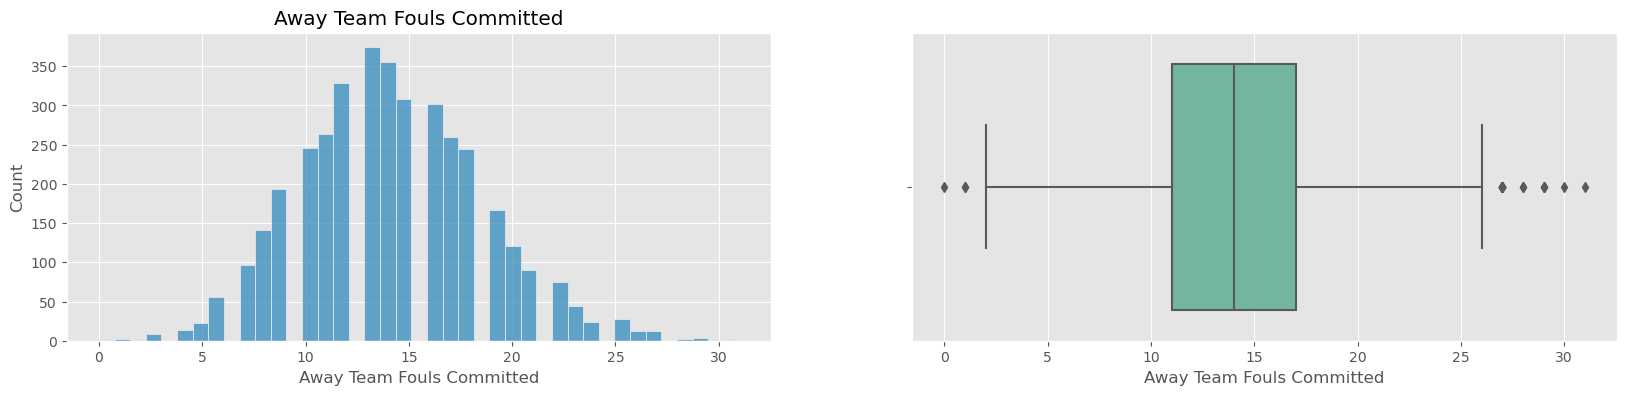

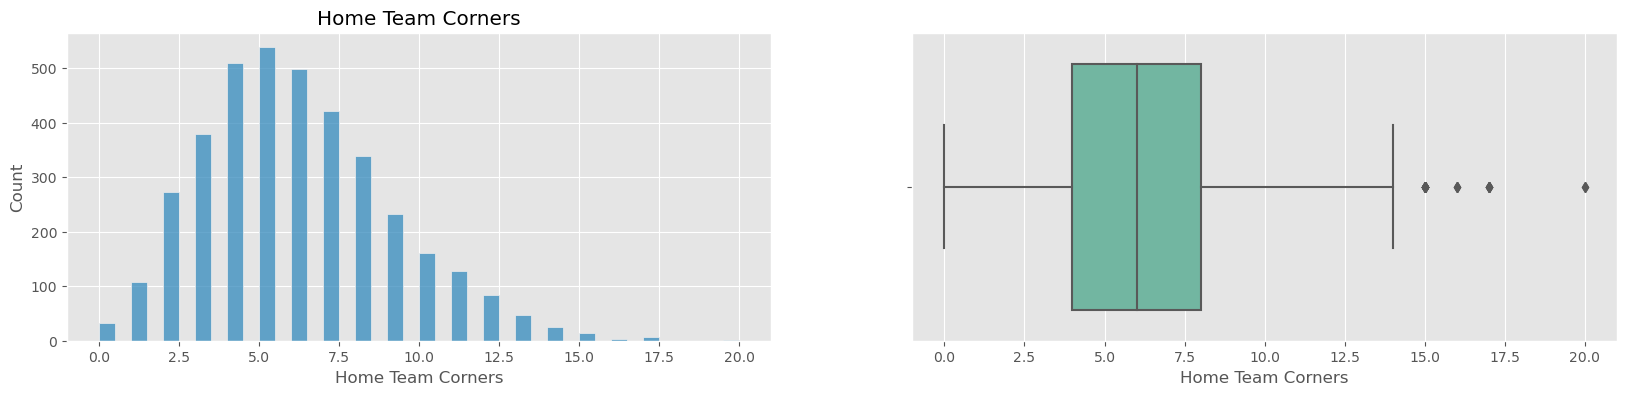

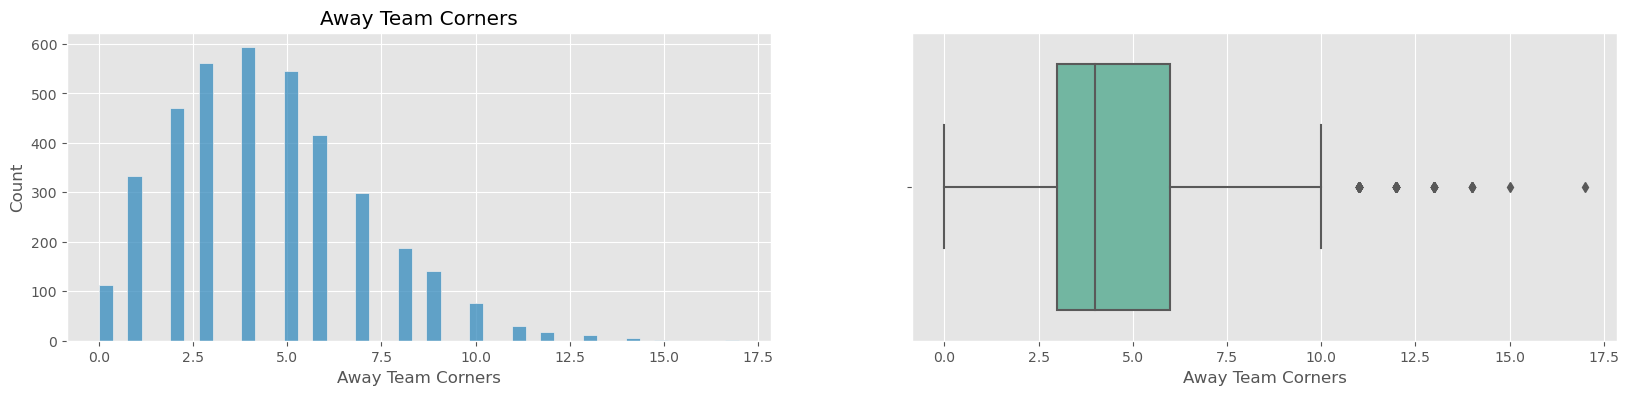

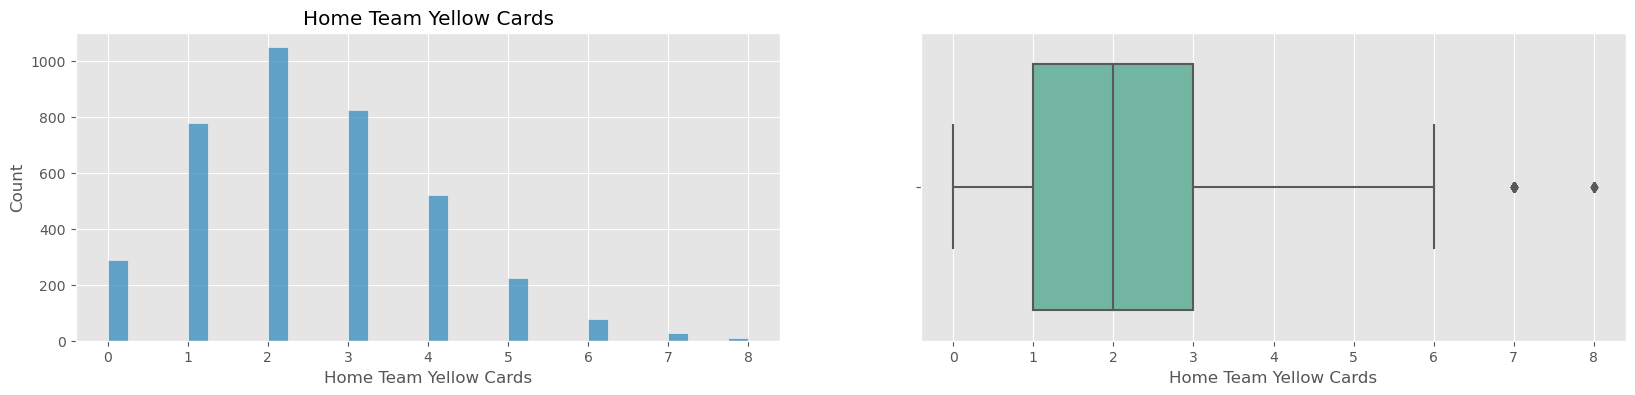

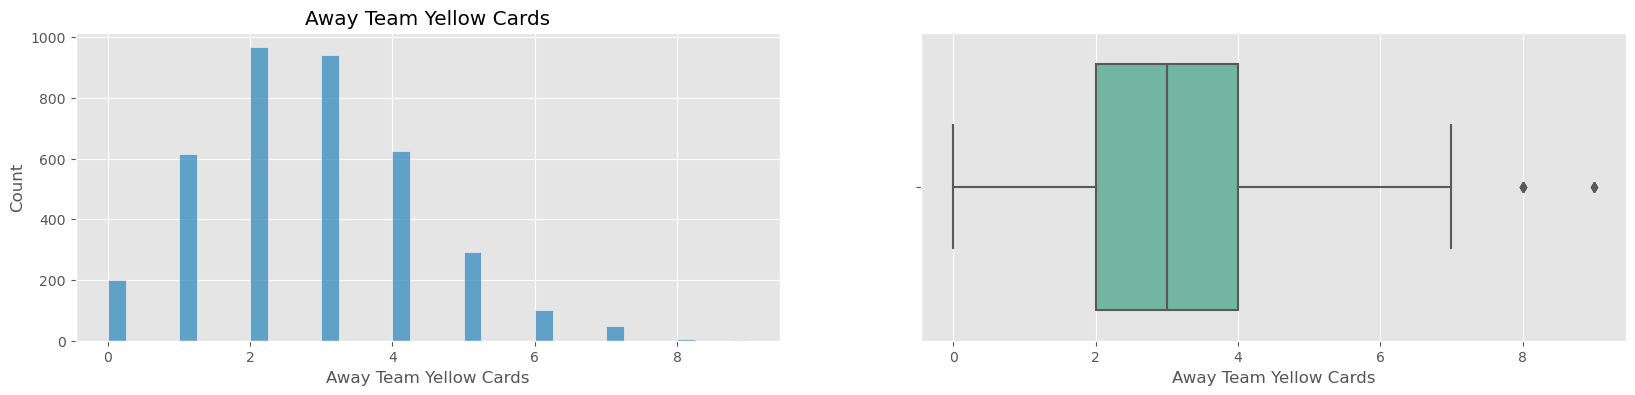

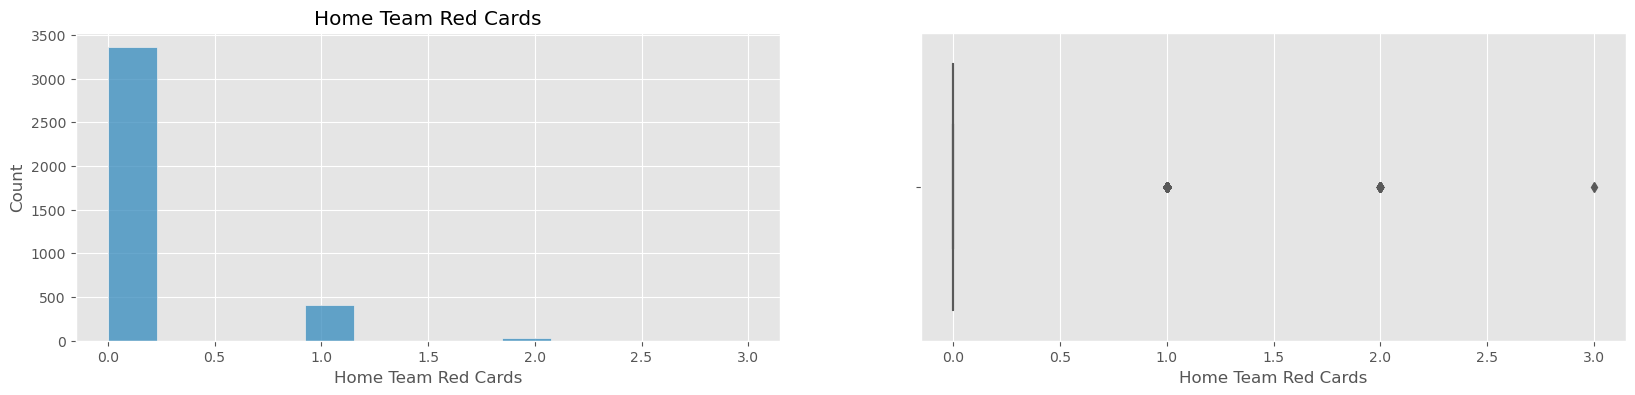

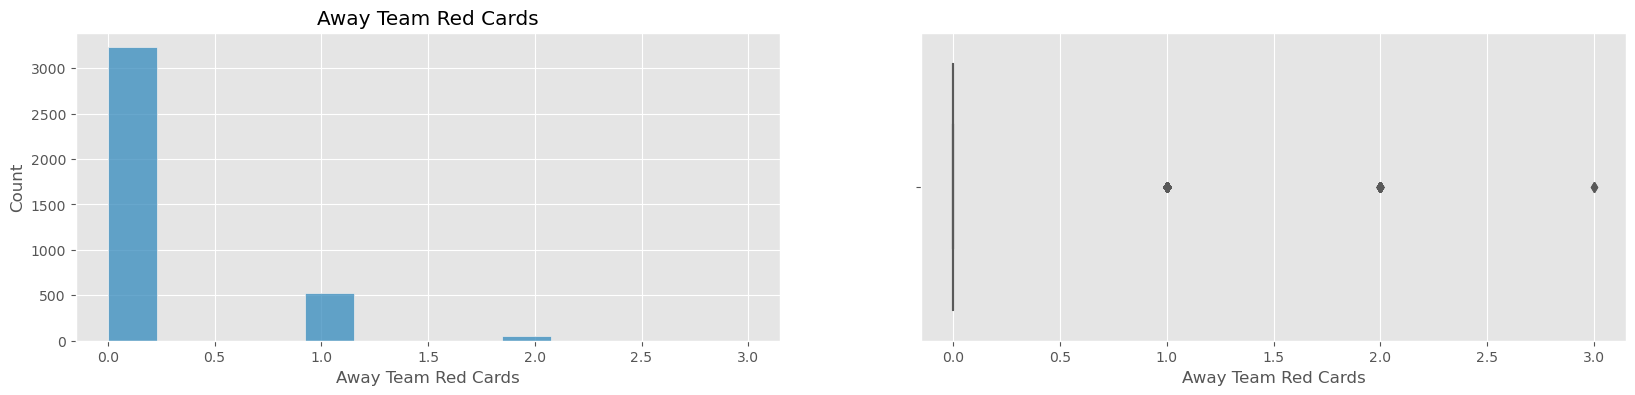

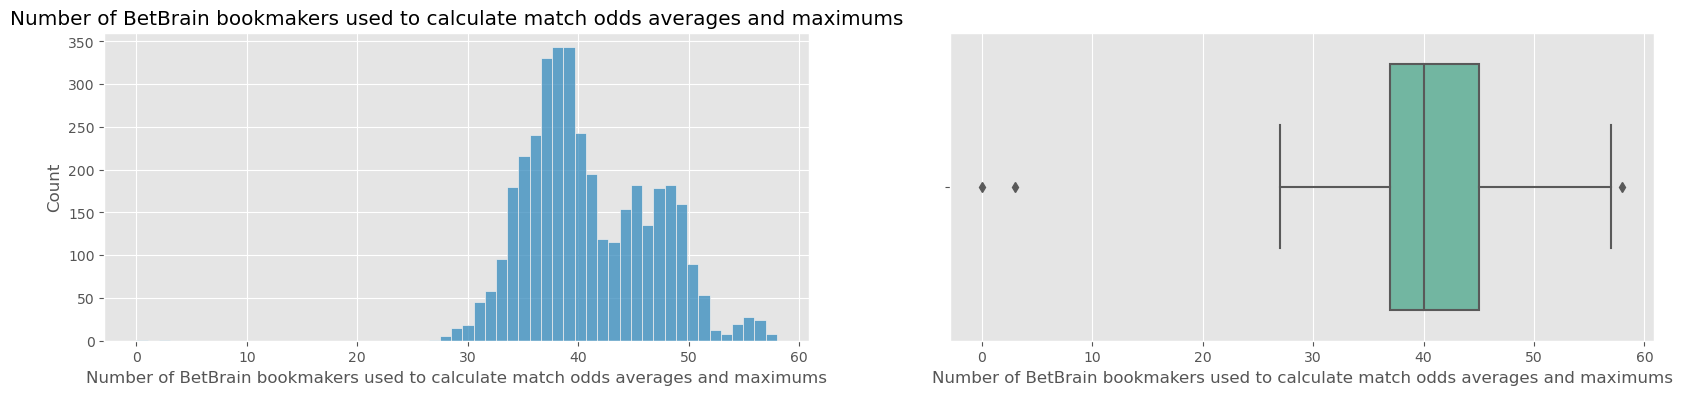

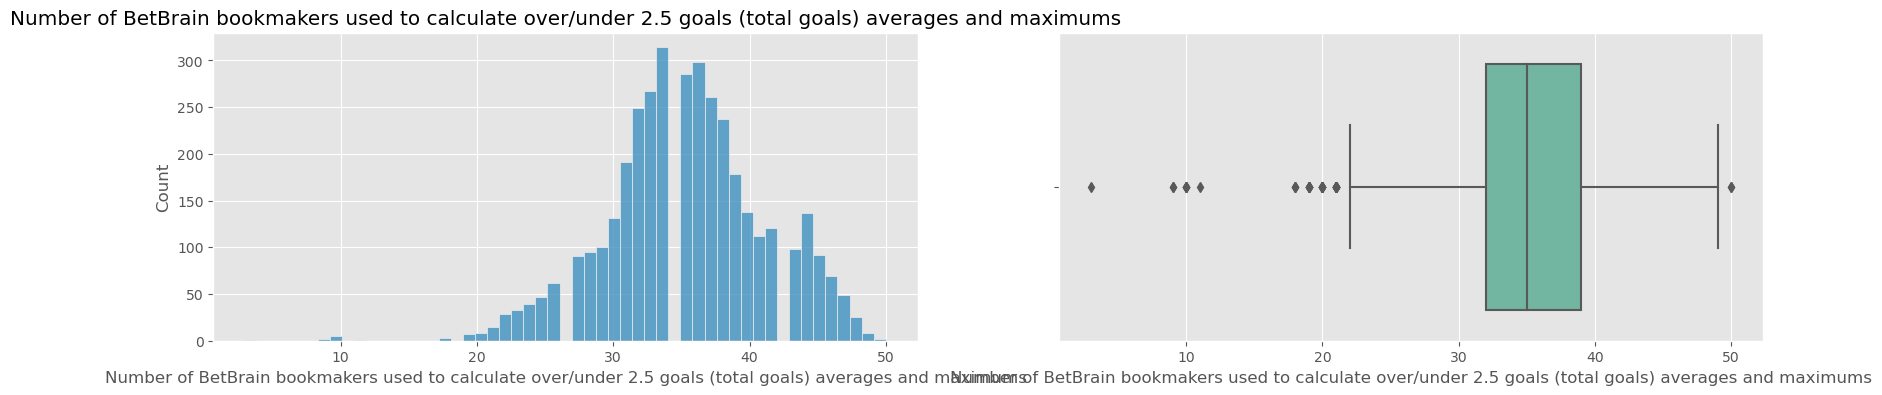

In [15]:
for col in numerical:
    plt.style.use("ggplot")    
    fig, ax = plt.subplots(1, 2, figsize=(20, 4))

    sns.histplot(data=df, x=col, palette="Set2", ax=ax[0]).set(title=col)
    sns.boxplot(data=df, x=col, palette="Set2", ax=ax[1])